# Financial Programming - IÉSEG, Lille - MBD 2020-2021
## Group Project - Financial Data

KEDA Ndjaidoukmi 

SHAH Pooja 

VARNELLI Alessandro 

###  DATA EXPLORATION

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np
pysqldf = lambda q: sqldf(q, globals())

In [2]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Input data**

In [3]:
# Each record describes static characteristics of an account
account = pd.read_csv('account.asc', sep=';')
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [4]:
# Check data size
account.shape

(4500, 4)

In [5]:
# Check missing values
account.isna().sum().sum()

0

In [6]:
account['date'].astype(str)

0       930101
1       930101
2       930101
3       930101
4       930102
         ...  
4495    971228
4496    971228
4497    971228
4498    971229
4499    971229
Name: date, Length: 4500, dtype: object

In [7]:
account['acc_open_year']=account['date'].astype(str).str[:2]
account['acc_open_month']=account['date'].astype(str).str[2:4]
account['acc_open_day']=account['date'].astype(str).str[-2:]

In [8]:
account['acc_open_year']='19'+account['acc_open_year']
account['acc_open_year']=account['acc_open_year'].astype(int) #convert into integer
account['acc_open_month']=account['acc_open_month'].astype(int) #convert into integer
account['acc_open_day']=account['acc_open_day'].astype(int) #convert into integer

In [9]:
account['acct_open_date'] = pd.to_datetime(dict(year=account.acc_open_year, month=account.acc_open_month, day=account.acc_open_day))
account.head()

,account_id,district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,acct_open_date
0,576,55,POPLATEK MESICNE,930101,1993,1,1,1993-01-01
1,3818,74,POPLATEK MESICNE,930101,1993,1,1,1993-01-01
2,704,55,POPLATEK MESICNE,930101,1993,1,1,1993-01-01
3,2378,16,POPLATEK MESICNE,930101,1993,1,1,1993-01-01
4,2632,24,POPLATEK MESICNE,930102,1993,1,2,1993-01-02


In [10]:
# Each record describes a credit card issued to an account
card = pd.read_csv('card.asc', sep=';')
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [11]:
# Check data size
card.shape

(892, 4)

In [12]:
# Check missing values
card.isna().sum().sum()

0

In [13]:
card['issued'].astype(str)

0      931107 00:00:00
1      940119 00:00:00
2      940205 00:00:00
3      940208 00:00:00
4      940215 00:00:00
            ...       
887    981226 00:00:00
888    981228 00:00:00
889    981228 00:00:00
890    981229 00:00:00
891    981229 00:00:00
Name: issued, Length: 892, dtype: object

In [14]:
card['issue_year']=card['issued'].astype(str).str[:2]
card['issue_month']=card['issued'].astype(str).str[2:4]
card['issue_day']=card['issued'].astype(str).str[4:6]

In [15]:
card['issue_year']='19'+card['issue_year']
card['issue_year']=card['issue_year'].astype(int) #convert into integer
card['issue_month']=card['issue_month'].astype(int) #convert into integer
card['issue_day']=card['issue_day'].astype(int) #convert into integer
card.head()

,card_id,disp_id,type,issued,issue_year,issue_month,issue_day
0,1005,9285,classic,931107 00:00:00,1993,11,7
1,104,588,classic,940119 00:00:00,1994,1,19
2,747,4915,classic,940205 00:00:00,1994,2,5
3,70,439,classic,940208 00:00:00,1994,2,8
4,577,3687,classic,940215 00:00:00,1994,2,15


In [16]:
# Each record describes characteristics of a client
client = pd.read_csv('client.asc', sep=';')
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [17]:
# Each record relates together a client with an account i.e. this relation describes the rights
# of clients to operate accounts
disp = pd.read_csv('disp.asc', sep=';')
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [18]:
# Check data size
disp.shape

(5369, 4)

In [19]:
# Check missing values
disp.isna().sum().sum()

0

In [20]:
# Each record describes characteristics of a payment order
order = pd.read_csv('order.asc', sep=';')
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [21]:
# Check data size
order.shape

(6471, 6)

In [22]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


In [23]:
# Check missing values
order.isna().sum().sum()

0

In [24]:
# Each record describes one transaction on an account
trans = pd.read_csv('trans.asc', sep=';', low_memory=False)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [25]:
#trans = pd.read_csv(r'C:\Users\avarnelli\Desktop\Group Project_Customer Loan\data_berka\trans.asc', sep=';', low_memory=False)
#trans

In [26]:
trans[trans['type'] == 'VYBER']['operation'].unique()

array(['VYBER'], dtype=object)

In [27]:
trans.groupby('type').agg(['count'])

,trans_id,account_id,date,operation,amount,balance,k_symbol,bank,account
,count,count,count,count,count,count,count,count,count
type,,,,,,,,,
PRIJEM,405083,405083,405083,221969,405083,405083,213452,65226,65226
VYBER,16666,16666,16666,16666,16666,16666,0,0,0
VYDAJ,634571,634571,634571,634571,634571,634571,360987,208282,230163


In [28]:
# Check data size
trans.shape

(1056320, 10)

In [29]:
trans['date'].astype(str)

0          930101
1          930101
2          930101
3          930101
4          930102
            ...  
1056315    981231
1056316    981231
1056317    981231
1056318    981231
1056319    981231
Name: date, Length: 1056320, dtype: object

In [30]:
trans['trans_year']=trans['date'].astype(str).str[:2]
trans['trans_month']=trans['date'].astype(str).str[2:4]
trans['trans_day']=trans['date'].astype(str).str[-2:]

In [31]:
trans['trans_year']='19'+trans['trans_year']
trans['trans_year']=trans['trans_year'].astype(int) #convert into integer
trans['trans_month']=trans['trans_month'].astype(int) #convert into integer
trans['trans_day']=trans['trans_day'].astype(int) #convert into integer
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993,1,1
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993,1,1
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993,1,1
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,1993,1,1
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,1993,1,2


In [32]:
# Check missing values
trans.isna().sum().sum()

2208738

In [33]:
# Each record describes a loan granted for a given account
loan = pd.read_csv('loan.asc', sep=';')
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


In [35]:
loan.isna().sum().sum()

0

In [36]:
# Each record describes demographic characteristics of a district.
district = pd.read_csv('district.asc', sep=';')
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [37]:
# Check data size
district.shape

(77, 16)

In [38]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4      77 non-null     int64  
 4   A5      77 non-null     int64  
 5   A6      77 non-null     int64  
 6   A7      77 non-null     int64  
 7   A8      77 non-null     int64  
 8   A9      77 non-null     int64  
 9   A10     77 non-null     float64
 10  A11     77 non-null     int64  
 11  A12     77 non-null     object 
 12  A13     77 non-null     float64
 13  A14     77 non-null     int64  
 14  A15     77 non-null     object 
 15  A16     77 non-null     int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB


In [39]:
# Check missing values
district.isna().sum().sum()

0

### DATA CLEANING

In [40]:
# Check missing values
trans.isna().sum().sum()

2208738

In [41]:
# Check missing values
loan.isna().sum().sum()

0

In [42]:
client.dtypes

client_id       int64
birth_number    int64
district_id     int64
dtype: object

In [43]:
loan['date'].astype(str)

0      930705
1      930711
2      930728
3      930803
4      930906
        ...  
677    981205
678    981205
679    981206
680    981206
681    981208
Name: date, Length: 682, dtype: object

In [44]:
loan['loan_year']=loan['date'].astype(str).str[:2]
loan['loan_month']=loan['date'].astype(str).str[2:4]
loan['loan_day']=loan['date'].astype(str).str[-2:]

In [45]:
loan['loan_year']='19'+loan['loan_year']
loan['loan_year']=loan['loan_year'].astype(int) #convert into integer
loan['loan_month']=loan['loan_month'].astype(int) #convert into integer
loan['loan_day']=loan['loan_day'].astype(int) #convert into integer

In [46]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status,loan_year,loan_month,loan_day
0,5314,1787,930705,96396,12,8033.0,B,1993,7,5
1,5316,1801,930711,165960,36,4610.0,A,1993,7,11
2,6863,9188,930728,127080,60,2118.0,A,1993,7,28
3,5325,1843,930803,105804,36,2939.0,A,1993,8,3
4,7240,11013,930906,274740,60,4579.0,A,1993,9,6


In [47]:
client['birth_year']=client['birth_number'].astype(str).str[:2]
client['birth_month']=client['birth_number'].astype(str).str[2:4]
client['birth_day']=client['birth_number'].astype(str).str[-2:]

In [48]:
client['birth_year']='19'+client['birth_year']
client['birth_year']=client['birth_year'].astype(int) #convert into integer

In [49]:
client['birth_day'] = client['birth_day'].astype(int) #convert day into int

In [50]:
client ['gender'] = 'M'
client.loc[client['birth_month'].astype(int)>50,'gender'] = 'F'

In [51]:
client['birth_month']=client['birth_month'].astype(int)
client.loc[client['birth_month']>50,'birth_month']=client.loc[client['birth_month']>50,'birth_month'].astype(int) - 50

In [52]:
client.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender
0,1,706213,18,1970,12,13,F
1,2,450204,1,1945,2,4,M
2,3,406009,1,1940,10,9,F
3,4,561201,5,1956,12,1,M
4,5,605703,5,1960,7,3,F


In [53]:
client.dtypes

client_id        int64
birth_number     int64
district_id      int64
birth_year       int32
birth_month      int32
birth_day        int32
gender          object
dtype: object

In [54]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     5369 non-null   int64 
 1   birth_number  5369 non-null   int64 
 2   district_id   5369 non-null   int64 
 3   birth_year    5369 non-null   int32 
 4   birth_month   5369 non-null   int32 
 5   birth_day     5369 non-null   int32 
 6   gender        5369 non-null   object
dtypes: int32(3), int64(3), object(1)
memory usage: 230.8+ KB


In [55]:
client['birth_number'].astype(str)

0       706213
1       450204
2       406009
3       561201
4       605703
         ...  
5364    456030
5365    430406
5366    680413
5367    626019
5368    535812
Name: birth_number, Length: 5369, dtype: object

In [56]:
# Age
client['age'] = 1999 - (client['birth_year'].astype(int))

In [57]:
# Age group
client['age_group'] = client['age'] // 10 * 10
client.head()

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group
0,1,706213,18,1970,12,13,F,29,20
1,2,450204,1,1945,2,4,M,54,50
2,3,406009,1,1940,10,9,F,59,50
3,4,561201,5,1956,12,1,M,43,40
4,5,605703,5,1960,7,3,F,39,30


### DATA MART CREATION:

#### STEP 1: We merge client and district tables on district code.

In [58]:
# Merging required columns from client and district tables
merge1 = pysqldf("""
SELECT t1.*, t2.A1 AS District_Code, t2.A2 AS District_Name, t2.A3 AS Region
FROM client AS t1
INNER JOIN district AS t2
ON t1.district_id = t2.A1
""")

In [59]:
merge1

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,District_Code,District_Name,Region
0,1,706213,18,1970,12,13,F,29,20,18,Pisek,south Bohemia
1,2,450204,1,1945,2,4,M,54,50,1,Hl.m. Praha,Prague
2,3,406009,1,1940,10,9,F,59,50,1,Hl.m. Praha,Prague
3,4,561201,5,1956,12,1,M,43,40,5,Kolin,central Bohemia
4,5,605703,5,1960,7,3,F,39,30,5,Kolin,central Bohemia
...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1945,10,30,F,54,50,1,Hl.m. Praha,Prague
5365,13956,430406,1,1943,4,6,M,56,50,1,Hl.m. Praha,Prague
5366,13968,680413,61,1968,4,13,M,31,30,61,Trebic,south Moravia
5367,13971,626019,67,1962,10,19,F,37,30,67,Bruntal,north Moravia


#### STEP 2: We merge the result of the previous step with the disposition table to get the new variables: Number of accounts and Number of disposition for client_id

In [60]:
# OPTION WITH SQL
essay1 = pysqldf("""
SELECT client_id ,count(account_id)
FROM  disp
GROUP BY client_id
""")
essay1

,client_id,count(account_id)
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
5364,13955,1
5365,13956,1
5366,13968,1
5367,13971,1


Each client has a single unique account

We now want to verify how many disponents have access to the bank account and save this value in the Disponents_for_account variable.

In [61]:
# OPTION WITH SQL
essay2 = pysqldf("""
select d.client_id, d.account_id, b.Disponents_for_account, d.type
FROM disp d left join 
(SELECT client_id, account_id, count(type) as Disponents_for_account
FROM  disp
GROUP BY account_id
) as b on d.account_id = b.account_id

""")
essay2

,client_id,account_id,Disponents_for_account,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,2,2,DISPONENT
3,4,3,2,OWNER
4,5,3,2,DISPONENT
...,...,...,...,...
5364,13955,11349,2,OWNER
5365,13956,11349,2,DISPONENT
5366,13968,11359,1,OWNER
5367,13971,11362,1,OWNER


Counting the number of holders per account - Owner and Disponents:

In [62]:
prova = pysqldf("""
SELECT account_id, count(client_id) as Disponents_for_account
FROM  disp
GROUP BY account_id
""")
prova

,account_id,Disponents_for_account
0,1,1
1,2,2
2,3,2
3,4,1
4,5,1
...,...,...
4495,11333,1
4496,11349,2
4497,11359,1
4498,11362,1


We can now merge the things together to have all relevant info together

In [63]:
merge2 = pysqldf("""
SELECT t1.*, t2.account_id AS account_id, t2.Disponents_for_account, t2.type
FROM merge1 AS t1
LEFT JOIN essay2 AS t2
ON t1.client_id = t2.client_id
""")
merge2

,client_id,birth_number,district_id,birth_year,birth_month,birth_day,gender,age,age_group,District_Code,District_Name,Region,account_id,Disponents_for_account,type
0,1,706213,18,1970,12,13,F,29,20,18,Pisek,south Bohemia,1,1,OWNER
1,2,450204,1,1945,2,4,M,54,50,1,Hl.m. Praha,Prague,2,2,OWNER
2,3,406009,1,1940,10,9,F,59,50,1,Hl.m. Praha,Prague,2,2,DISPONENT
3,4,561201,5,1956,12,1,M,43,40,5,Kolin,central Bohemia,3,2,OWNER
4,5,605703,5,1960,7,3,F,39,30,5,Kolin,central Bohemia,3,2,DISPONENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1945,10,30,F,54,50,1,Hl.m. Praha,Prague,11349,2,OWNER
5365,13956,430406,1,1943,4,6,M,56,50,1,Hl.m. Praha,Prague,11349,2,DISPONENT
5366,13968,680413,61,1968,4,13,M,31,30,61,Trebic,south Moravia,11359,1,OWNER
5367,13971,626019,67,1962,10,19,F,37,30,67,Bruntal,north Moravia,11362,1,OWNER


#### STEP 3: We merge the result of the previous step with the card table to get the information about credit card linked to client_id

Checking to verify that there are no customers with more than 1 card associated.

In [64]:
# OPTION WITH SQL
essay3 = pysqldf("""
SELECT c.client_id, count(card_id)
FROM  client as c left join disp as b on b.client_id = c.client_id  inner join card as a on a.disp_id = b.disp_id
group by b.disp_id
having count(card_id) >1
""")
essay3

,client_id,count(card_id)


Creating new columns for type of card owned

In [65]:
card

,card_id,disp_id,type,issued,issue_year,issue_month,issue_day
0,1005,9285,classic,931107 00:00:00,1993,11,7
1,104,588,classic,940119 00:00:00,1994,1,19
2,747,4915,classic,940205 00:00:00,1994,2,5
3,70,439,classic,940208 00:00:00,1994,2,8
4,577,3687,classic,940215 00:00:00,1994,2,15
...,...,...,...,...,...,...,...
887,125,694,gold,981226 00:00:00,1998,12,26
888,674,4360,classic,981228 00:00:00,1998,12,28
889,322,2063,classic,981228 00:00:00,1998,12,28
890,685,4467,classic,981229 00:00:00,1998,12,29


There is no need to use min or max for the date as we just have a card for each so we can just create a new variable that identifies the years since when the card is in use.

In [66]:
card['Years_Since_Card']= 1999 - card['issue_year'].astype(int)

In [67]:
card

,card_id,disp_id,type,issued,issue_year,issue_month,issue_day,Years_Since_Card
0,1005,9285,classic,931107 00:00:00,1993,11,7,6
1,104,588,classic,940119 00:00:00,1994,1,19,5
2,747,4915,classic,940205 00:00:00,1994,2,5,5
3,70,439,classic,940208 00:00:00,1994,2,8,5
4,577,3687,classic,940215 00:00:00,1994,2,15,5
...,...,...,...,...,...,...,...,...
887,125,694,gold,981226 00:00:00,1998,12,26,1
888,674,4360,classic,981228 00:00:00,1998,12,28,1
889,322,2063,classic,981228 00:00:00,1998,12,28,1
890,685,4467,classic,981229 00:00:00,1998,12,29,1


From this version of card dataset we can go on with merging.

We need to check that number of accounts for customer is max 1:

In [68]:
# OPTION WITH SQL
essay4 = pysqldf("""
SELECT client_id, count(account_id)
FROM  disp
group by client_id
having count(account_id) >1
""")
essay4

,client_id,count(account_id)


We can now merge everything safely.

In [69]:
# OPTION WITH SQL
merge3 = pysqldf("""
SELECT c.client_id,c.account_id, c.birth_year, c.birth_month,c.birth_day,c.gender,c.age,c.age_group, c.District_code, 
       c.District_Name, c.Region,c.Disponents_for_account, c.type as client_type,  a.type as card_type, a.Years_Since_Card
FROM  merge2 as c left join disp d on d.client_id = c.client_id left join card as a on a.disp_id = d.disp_id

""")
merge3

,client_id,account_id,birth_year,birth_month,birth_day,gender,age,age_group,District_Code,District_Name,Region,Disponents_for_account,client_type,card_type,Years_Since_Card
0,1,1,1970,12,13,F,29,20,18,Pisek,south Bohemia,1,OWNER,None,NaN
1,2,2,1945,2,4,M,54,50,1,Hl.m. Praha,Prague,2,OWNER,None,NaN
2,3,2,1940,10,9,F,59,50,1,Hl.m. Praha,Prague,2,DISPONENT,None,NaN
3,4,3,1956,12,1,M,43,40,5,Kolin,central Bohemia,2,OWNER,None,NaN
4,5,3,1960,7,3,F,39,30,5,Kolin,central Bohemia,2,DISPONENT,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,11349,1945,10,30,F,54,50,1,Hl.m. Praha,Prague,2,OWNER,None,NaN
5365,13956,11349,1943,4,6,M,56,50,1,Hl.m. Praha,Prague,2,DISPONENT,None,NaN
5366,13968,11359,1968,4,13,M,31,30,61,Trebic,south Moravia,1,OWNER,classic,4.0
5367,13971,11362,1962,10,19,F,37,30,67,Bruntal,north Moravia,1,OWNER,None,NaN


It is still ok that we got NaN values as not everyone has a card and we set the left join to keep all clients in the analysis and not just owners of a card.

In [70]:
merge3.replace(np.NaN, 0)

,client_id,account_id,birth_year,birth_month,birth_day,gender,age,age_group,District_Code,District_Name,Region,Disponents_for_account,client_type,card_type,Years_Since_Card
0,1,1,1970,12,13,F,29,20,18,Pisek,south Bohemia,1,OWNER,0,0.0
1,2,2,1945,2,4,M,54,50,1,Hl.m. Praha,Prague,2,OWNER,0,0.0
2,3,2,1940,10,9,F,59,50,1,Hl.m. Praha,Prague,2,DISPONENT,0,0.0
3,4,3,1956,12,1,M,43,40,5,Kolin,central Bohemia,2,OWNER,0,0.0
4,5,3,1960,7,3,F,39,30,5,Kolin,central Bohemia,2,DISPONENT,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,11349,1945,10,30,F,54,50,1,Hl.m. Praha,Prague,2,OWNER,0,0.0
5365,13956,11349,1943,4,6,M,56,50,1,Hl.m. Praha,Prague,2,DISPONENT,0,0.0
5366,13968,11359,1968,4,13,M,31,30,61,Trebic,south Moravia,1,OWNER,classic,4.0
5367,13971,11362,1962,10,19,F,37,30,67,Bruntal,north Moravia,1,OWNER,0,0.0


#### STEP 4: We merge Transaction, Disposition and Loan table

In [71]:
merge4 = pysqldf("""
SELECT t2.client_id, t1.account_id, min(amount) AS min_trans_amount, max(amount) AS max_trans_amount, 
       avg(amount) as mean_trans_amount, count(*) as nbr_trans, total_loan, nbr_loan, loan_duration, last_balance, loan_status
FROM trans as t1 LEFT JOIN disp as t2 
ON t1.account_id = t2.account_id
LEFT JOIN (SELECT account_id, status as loan_status, sum(amount) as total_loan, count(*) as nbr_loan, duration as loan_duration
FROM loan
GROUP BY account_id) as t3 
ON t1.account_id = t3.account_id
INNER JOIN (SELECT account_id, balance as last_balance
FROM trans
GROUP BY account_id
HAVING date = max(date)) as t4
ON t1.account_id = t4.account_id
GROUP BY t2.client_id
""")
merge4

,client_id,account_id,min_trans_amount,max_trans_amount,mean_trans_amount,nbr_trans,total_loan,nbr_loan,loan_duration,last_balance,loan_status
0,1,1,14.6,12600.0,1569.767782,239,NaN,NaN,NaN,13466.5,None
1,2,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,A
2,3,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,A
3,4,3,14.6,11253.0,2521.553846,117,NaN,NaN,NaN,51096.1,None
4,5,3,14.6,11253.0,2521.553846,117,NaN,NaN,NaN,51096.1,None
...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,11349,30.0,64800.0,13017.671711,304,419880.0,1.0,60.0,33977.9,C
5365,13956,11349,30.0,64800.0,13017.671711,304,419880.0,1.0,60.0,33977.9,C
5366,13968,11359,14.6,40521.0,7799.157143,378,54024.0,1.0,12.0,75200.4,A
5367,13971,11362,14.6,24212.0,3866.309593,344,129408.0,1.0,24.0,38530.6,A


#### STEP 5: We now merge table merge3 and merge4

In [72]:
merge5 = pysqldf("""
SELECT t1.*, t2.birth_year, t2.birth_month, t2.gender, t2.age, t2.age_group,t2.District_Code, t2.District_Name,
       t2.Region, t2.Disponents_for_account, t2.client_type, t2.card_type, t2.Years_Since_Card

FROM  merge4 as t1 left join merge3 as t2 on t1.client_id = t2.client_id

""")
merge5.head()

,client_id,account_id,min_trans_amount,max_trans_amount,mean_trans_amount,nbr_trans,total_loan,nbr_loan,loan_duration,last_balance,...,gender,age,age_group,District_Code,District_Name,Region,Disponents_for_account,client_type,card_type,Years_Since_Card
0,1,1,14.6,12600.0,1569.767782,239,NaN,NaN,NaN,13466.5,...,F,29,20,18,Pisek,south Bohemia,1,OWNER,None,NaN
1,2,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,M,54,50,1,Hl.m. Praha,Prague,2,OWNER,None,NaN
2,3,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,F,59,50,1,Hl.m. Praha,Prague,2,DISPONENT,None,NaN
3,4,3,14.6,11253.0,2521.553846,117,NaN,NaN,NaN,51096.1,...,M,43,40,5,Kolin,central Bohemia,2,OWNER,None,NaN
4,5,3,14.6,11253.0,2521.553846,117,NaN,NaN,NaN,51096.1,...,F,39,30,5,Kolin,central Bohemia,2,DISPONENT,None,NaN


In [73]:
merge5.columns

Index(['client_id', 'account_id', 'min_trans_amount', 'max_trans_amount',
       'mean_trans_amount', 'nbr_trans', 'total_loan', 'nbr_loan',
       'loan_duration', 'last_balance', 'loan_status', 'birth_year',
       'birth_month', 'gender', 'age', 'age_group', 'District_Code',
       'District_Name', 'Region', 'Disponents_for_account', 'client_type',
       'card_type', 'Years_Since_Card'],
      dtype='object')

#### STEP 6:  Payment Orders table

In [74]:
# creating a dataframe with account_id that had payment orders and the total number of orders placed
nbr_orders = order.groupby(['account_id'])['order_id'].count()
nbr_orders.to_frame().head()

,order_id
account_id,
1,1
2,2
3,3
4,2
5,1


In [75]:
# creating a dataframe with account_id that had payment orders and the sum of all order amounts
amount_sum = order.groupby(['account_id'])['amount'].sum()
amount_sum.to_frame().head()

,amount
account_id,
1,2452.0
2,10638.7
3,5001.0
4,3363.0
5,2668.0


In [76]:
# Merging the above two dataframes into one
order_df = pd.merge(nbr_orders, amount_sum, on='account_id')
order_df.head()

,order_id,amount
account_id,,
1,1,2452.0
2,2,10638.7
3,3,5001.0
4,2,3363.0
5,1,2668.0


In [77]:
# Renaming the columns for clarity
order_df.rename(columns = {'order_id':'Nbr_of_payement_orders', 'amount':'Sum_of_all_orders'}, inplace = True) 
order_df.head()

,Nbr_of_payement_orders,Sum_of_all_orders
account_id,,
1,1,2452.0
2,2,10638.7
3,3,5001.0
4,2,3363.0
5,1,2668.0


#### STEP 7: Account table - processing

In [78]:
# Adding a new column for length or relationship with the bank as 'lor_with_bank'
account['lor_with_bank'] = 1999 - account['acc_open_year']
account.head()

,account_id,district_id,frequency,date,acc_open_year,acc_open_month,acc_open_day,acct_open_date,lor_with_bank
0,576,55,POPLATEK MESICNE,930101,1993,1,1,1993-01-01,6
1,3818,74,POPLATEK MESICNE,930101,1993,1,1,1993-01-01,6
2,704,55,POPLATEK MESICNE,930101,1993,1,1,1993-01-01,6
3,2378,16,POPLATEK MESICNE,930101,1993,1,1,1993-01-01,6
4,2632,24,POPLATEK MESICNE,930102,1993,1,2,1993-01-02,6


In [79]:
# Selecting necessary columns for merging with data mart 
account_df = account[['account_id','acc_open_year','lor_with_bank']]
account_df.head()

,account_id,acc_open_year,lor_with_bank
0,576,1993,6
1,3818,1993,6
2,704,1993,6
3,2378,1993,6
4,2632,1993,6


#### STEP 8: Merging ACCOUNT and ORDER tables

In [80]:
# Merging account table with orders table
account_orders = pd.merge(account_df, order_df, on='account_id', how='left')
account_orders.head()

,account_id,acc_open_year,lor_with_bank,Nbr_of_payement_orders,Sum_of_all_orders
0,576,1993,6,1.0,3662.0
1,3818,1993,6,3.0,9135.0
2,704,1993,6,2.0,3338.0
3,2378,1993,6,1.0,9612.0
4,2632,1993,6,3.0,4383.0


#### STEP 9: FINAL MERGE for Datamart: Merge table merge5 with account_orders table as merge6

In [81]:
# Merging account and orders tables to data mart
merge6 = pd.merge(merge5, account_orders, on='account_id', how='left' )
merge6

,client_id,account_id,min_trans_amount,max_trans_amount,mean_trans_amount,nbr_trans,total_loan,nbr_loan,loan_duration,last_balance,...,District_Name,Region,Disponents_for_account,client_type,card_type,Years_Since_Card,acc_open_year,lor_with_bank,Nbr_of_payement_orders,Sum_of_all_orders
0,1,1,14.6,12600.0,1569.767782,239,NaN,NaN,NaN,13466.5,...,Pisek,south Bohemia,1,OWNER,None,NaN,1995,4,1.0,2452.0
1,2,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,Hl.m. Praha,Prague,2,OWNER,None,NaN,1993,6,2.0,10638.7
2,3,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,Hl.m. Praha,Prague,2,DISPONENT,None,NaN,1993,6,2.0,10638.7
3,4,3,14.6,11253.0,2521.553846,117,NaN,NaN,NaN,51096.1,...,Kolin,central Bohemia,2,OWNER,None,NaN,1997,2,3.0,5001.0
4,5,3,14.6,11253.0,2521.553846,117,NaN,NaN,NaN,51096.1,...,Kolin,central Bohemia,2,DISPONENT,None,NaN,1997,2,3.0,5001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,11349,30.0,64800.0,13017.671711,304,419880.0,1.0,60.0,33977.9,...,Hl.m. Praha,Prague,2,OWNER,None,NaN,1995,4,2.0,17884.0
5365,13956,11349,30.0,64800.0,13017.671711,304,419880.0,1.0,60.0,33977.9,...,Hl.m. Praha,Prague,2,DISPONENT,None,NaN,1995,4,2.0,17884.0
5366,13968,11359,14.6,40521.0,7799.157143,378,54024.0,1.0,12.0,75200.4,...,Trebic,south Moravia,1,OWNER,classic,4.0,1994,5,3.0,9274.3
5367,13971,11362,14.6,24212.0,3866.309593,344,129408.0,1.0,24.0,38530.6,...,Bruntal,north Moravia,1,OWNER,None,NaN,1995,4,5.0,10687.0


In [82]:
# Replacing NaN with 0
merge6.replace(np.NaN, 0)

,client_id,account_id,min_trans_amount,max_trans_amount,mean_trans_amount,nbr_trans,total_loan,nbr_loan,loan_duration,last_balance,...,District_Name,Region,Disponents_for_account,client_type,card_type,Years_Since_Card,acc_open_year,lor_with_bank,Nbr_of_payement_orders,Sum_of_all_orders
0,1,1,14.6,12600.0,1569.767782,239,0.0,0.0,0.0,13466.5,...,Pisek,south Bohemia,1,OWNER,0,0.0,1995,4,1.0,2452.0
1,2,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,Hl.m. Praha,Prague,2,OWNER,0,0.0,1993,6,2.0,10638.7
2,3,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,Hl.m. Praha,Prague,2,DISPONENT,0,0.0,1993,6,2.0,10638.7
3,4,3,14.6,11253.0,2521.553846,117,0.0,0.0,0.0,51096.1,...,Kolin,central Bohemia,2,OWNER,0,0.0,1997,2,3.0,5001.0
4,5,3,14.6,11253.0,2521.553846,117,0.0,0.0,0.0,51096.1,...,Kolin,central Bohemia,2,DISPONENT,0,0.0,1997,2,3.0,5001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,11349,30.0,64800.0,13017.671711,304,419880.0,1.0,60.0,33977.9,...,Hl.m. Praha,Prague,2,OWNER,0,0.0,1995,4,2.0,17884.0
5365,13956,11349,30.0,64800.0,13017.671711,304,419880.0,1.0,60.0,33977.9,...,Hl.m. Praha,Prague,2,DISPONENT,0,0.0,1995,4,2.0,17884.0
5366,13968,11359,14.6,40521.0,7799.157143,378,54024.0,1.0,12.0,75200.4,...,Trebic,south Moravia,1,OWNER,classic,4.0,1994,5,3.0,9274.3
5367,13971,11362,14.6,24212.0,3866.309593,344,129408.0,1.0,24.0,38530.6,...,Bruntal,north Moravia,1,OWNER,0,0.0,1995,4,5.0,10687.0


In [83]:
merge6.columns

Index(['client_id', 'account_id', 'min_trans_amount', 'max_trans_amount',
       'mean_trans_amount', 'nbr_trans', 'total_loan', 'nbr_loan',
       'loan_duration', 'last_balance', 'loan_status', 'birth_year',
       'birth_month', 'gender', 'age', 'age_group', 'District_Code',
       'District_Name', 'Region', 'Disponents_for_account', 'client_type',
       'card_type', 'Years_Since_Card', 'acc_open_year', 'lor_with_bank',
       'Nbr_of_payement_orders', 'Sum_of_all_orders'],
      dtype='object')

In [84]:
datamart = merge6.drop(columns=['District_Code'])

In [85]:
datamart.columns

Index(['client_id', 'account_id', 'min_trans_amount', 'max_trans_amount',
       'mean_trans_amount', 'nbr_trans', 'total_loan', 'nbr_loan',
       'loan_duration', 'last_balance', 'loan_status', 'birth_year',
       'birth_month', 'gender', 'age', 'age_group', 'District_Name', 'Region',
       'Disponents_for_account', 'client_type', 'card_type',
       'Years_Since_Card', 'acc_open_year', 'lor_with_bank',
       'Nbr_of_payement_orders', 'Sum_of_all_orders'],
      dtype='object')

#### EXPORTING datamart to CSV file

In [86]:
# Saving the datamart as a csv file
datamart.to_csv('datamart.csv', index = True)

In [87]:
# checking for nulls
datamart.isna().sum()

client_id                    0
account_id                   0
min_trans_amount             0
max_trans_amount             0
mean_trans_amount            0
nbr_trans                    0
total_loan                4542
nbr_loan                  4542
loan_duration             4542
last_balance                 0
loan_status               4542
birth_year                   0
birth_month                  0
gender                       0
age                          0
age_group                    0
District_Name                0
Region                       0
Disponents_for_account       0
client_type                  0
card_type                 4477
Years_Since_Card          4477
acc_open_year                0
lor_with_bank                0
Nbr_of_payement_orders     809
Sum_of_all_orders          809
dtype: int64

In [88]:
# Replacing NaN with 0 in the datamart
datamart.replace(np.NaN, 0)
datamart.head(2)

,client_id,account_id,min_trans_amount,max_trans_amount,mean_trans_amount,nbr_trans,total_loan,nbr_loan,loan_duration,last_balance,...,District_Name,Region,Disponents_for_account,client_type,card_type,Years_Since_Card,acc_open_year,lor_with_bank,Nbr_of_payement_orders,Sum_of_all_orders
0,1,1,14.6,12600.0,1569.767782,239,NaN,NaN,NaN,13466.5,...,Pisek,south Bohemia,1,OWNER,None,NaN,1995,4,1.0,2452.0
1,2,2,13.5,42000.0,6593.052929,478,80952.0,1.0,24.0,42628.1,...,Hl.m. Praha,Prague,2,OWNER,None,NaN,1993,6,2.0,10638.7


As now we have finalized the datamart, we can start with all the business questions and insights we want to obtain from that.

### ANALYSIS BY AGE AND GENDER

Number of Clients Per Age Group

In [89]:
# Counting number of clients per age group
count_by_agegroup = pysqldf("""
SELECT  age_group, count(client_id) AS Nbr_of_clients
FROM datamart
GROUP BY age_group
""")
count_by_agegroup

,age_group,Nbr_of_clients
0,10,166
1,20,1022
2,30,959
3,40,976
4,50,992
5,60,653
6,70,487
7,80,114


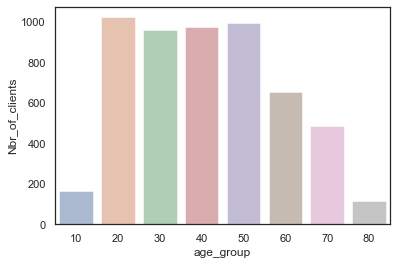

In [130]:
# Visualising the clients per age group with a bar plot
viz = sns.barplot(x = 'age_group',
            y = 'Nbr_of_clients',
            alpha=0.5,
            data=count_by_agegroup)
viz

Majority of the clients fall under the age group of 20-50 years. There's a decline in number of clients after age-group crosses 50 years. Age-group of 20 has the highest number of clients while 80 years has the lowest.

Number of Male & Female Clients Per Age Group:

In [91]:
# Grouping the table by age_group and gender to count the number of client_ids per group

age_gender_table = datamart.pivot_table(index='age_group',
                               columns='gender',
                               values='client_id', 
                               aggfunc='count') 
age_gender_table.head()

gender,F,M
age_group,,
10,79,87
20,525,497


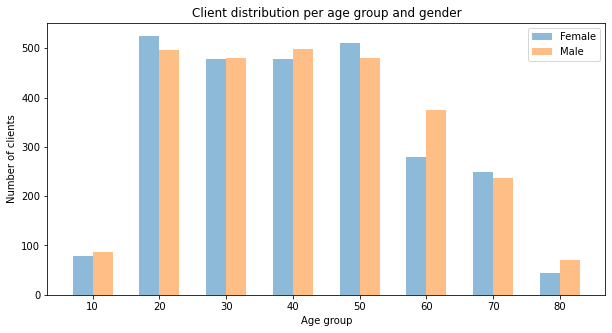

In [92]:
# Visualization of clients per age group and gender

# Defining the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)

# Plotting the graph
plt.bar(age_gender_table.index, height = age_gender_table['F'], width=3, alpha = 0.5)
plt.bar(age_gender_table.index + 3, height = age_gender_table['M'], width=3, alpha = 0.5)

# Fix the tick label of x axis
plt.xticks(age_gender_table.index + 3/2, age_gender_table.index)

# Adding labels for the plot
plt.title('Client distribution per age group and gender')
plt.xlabel('Age group')
plt.ylabel('Number of clients')
plt.legend(labels=['Female', 'Male'], loc='upper right')

plt.show()

The ratio of male and female clients seem to be quite similar on average. A big difference is observed in the age group of 60 and 80 years where the number of females are quite low compared to the males of the same category.


In [93]:
# Filtering and counting number of loans per age-group and gender
loans_gender_age = pysqldf("""
SELECT  age_group, gender, count(nbr_loan) AS Nbr_of_loans
FROM datamart
WHERE client_type = "OWNER" AND
      total_loan != "NaN"
GROUP BY age_group, gender
""")
loans_gender_age

,age_group,gender,Nbr_of_loans
0,10,F,13
1,10,M,3
2,20,F,79
3,20,M,68
4,30,F,80
5,30,M,78
6,40,F,82
7,40,M,75
8,50,F,85
9,50,M,67


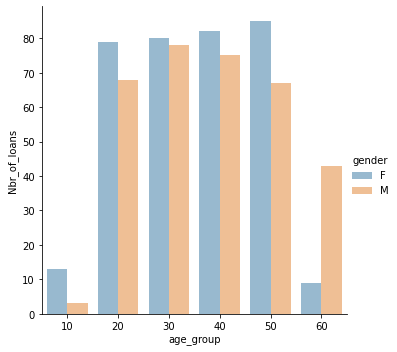

In [94]:
# Visualizing the distribution of loans across age-groups and gender using a category plot
viz1 = sns.catplot(x="age_group", y="Nbr_of_loans", hue="gender", kind="bar", alpha=0.5, data=loans_gender_age)
viz1

This is a very interesting graph - We see that from age 10 to 50, more females have borrowed loans compare to males. On the contrary, for age group 60, suddenly the number of loans taken by females have gone drastically down to around 10% from around 85%. There are no loan borrowers after the age-group of 60. Looking at the total count of loans (males & females), age-group of 30 and 40 have maximum borrowers.


In [95]:
# Type of credit card held per age group
checking = pd.merge(client, disp, on='client_id', how='inner')
checking1 = pd.merge(checking, card, on='disp_id', how='inner')
checking1.head(2)

many_cards = pysqldf("""

 SELECT  DISTINCT client_id, count(card_id)
 FROM checking1

 Group by client_id

 Having count(card_id) > 1

 """)
# many_cards

cards_agegroup = checking1.pivot_table(index='age_group',  # Group by
                               columns='type_y',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
cards_agegroup

type_y,classic,gold,junior
age_group,,,
10,NaN,NaN,52.0
20,108.0,13.0,93.0
30,150.0,21.0,NaN
40,149.0,21.0,NaN
50,198.0,20.0,NaN
60,45.0,13.0,NaN
70,8.0,NaN,NaN
80,1.0,NaN,NaN


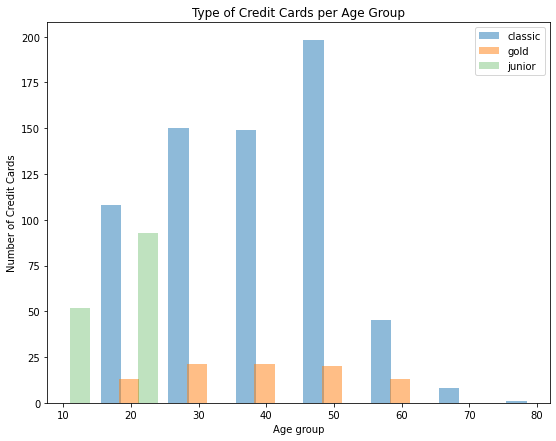

In [96]:
# Visualization of type of credit cards held by different age groups

# Defining the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(9, 7, forward=True)

# Plotting the graph
plt.bar(cards_agegroup.index, height = cards_agegroup['classic'], width=3, alpha = 0.5)
plt.bar(cards_agegroup.index + 2.75, height = cards_agegroup['gold'], width=3, alpha=0.5)
plt.bar(cards_agegroup.index + 5.5, height = cards_agegroup['junior'], width=3, alpha = 0.3)

# Fix the tick label of x axis
plt.xticks(cards_agegroup.index + 3, cards_agegroup.index)

# Adding labels for the plot
plt.title('Type of Credit Cards per Age Group')
plt.xlabel('Age group')
plt.ylabel('Number of Credit Cards')
plt.legend(labels=['classic','gold','junior'], loc='upper right')

plt.show()

Most of the card holders have a Classic card. Maximum card holders are in the age group of 50. The ratio of junior card holders (145) against the total number of clients below 20 years (1188) is very less.
There are hardly any credit card holders above the age of 70. 
Gold card holders (88) are less than 10% of the total card holders (892).

In [97]:
# Card holders per gender
cards_gender = checking1.pivot_table(index='type_y',  # Group by
                               columns='gender',  # Group by
                               values='client_id',  # Column to aggregate
                               aggfunc='count')  # Aggregate function
cards_gender

gender,F,M
type_y,,
classic,317,342
gold,35,53
junior,71,74


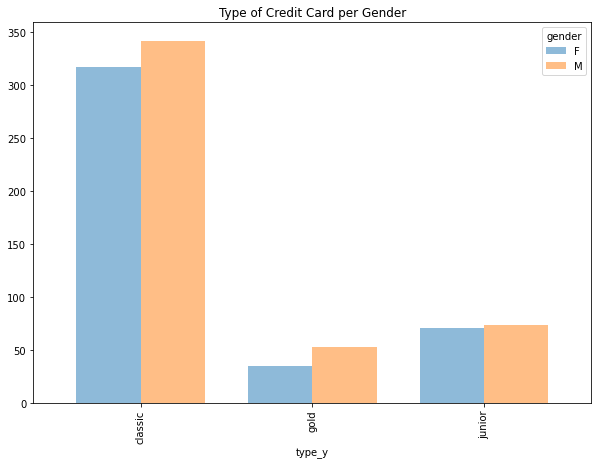

In [98]:
# Visualizing the distribution of credit cards by gender
cards_gender.plot (kind = 'bar',
                    title = 'Type of Credit Card per Gender',
                    width = 0.75,
                   alpha=0.5,
                    figsize = (10, 7))

In contrast with distribution of loans where females seemed to lead in most age-groups, for credit cards, its the males who have a greater % share for credit cards. However, the difference in numbers between genders is not that high.


### CLIENT DISTRIBUTION PER DISTRICT

In [99]:
client_district = pd.DataFrame(datamart.groupby(['District_Name', 'Region'])['District_Name'].count())
client_district.columns = ['Nbr_Client']

In [100]:
client_district.reset_index(inplace=True)

In [101]:
client_district.index = client_district.District_Name

In [102]:
client_district[client_district.District_Name == 'Karvina']

,District_Name,Region,Nbr_Client
District_Name,,,
Karvina,Karvina,north Moravia,169


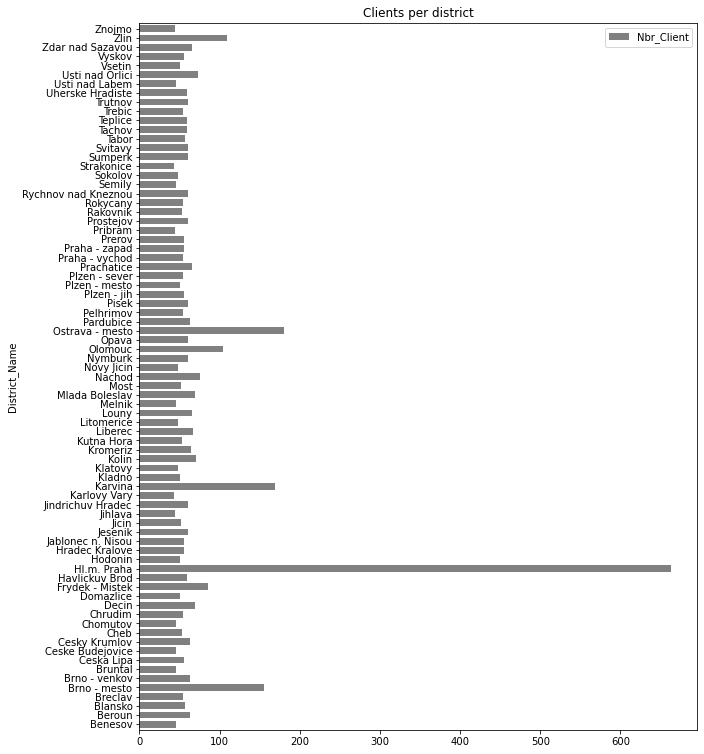

In [103]:
client_district.plot (kind = 'barh',
                    title = 'Clients per district',
                    width = 0.75,
                    figsize = (10, 13),
                    color = 'grey'
                      )

In [104]:
client_region = datamart.groupby(['Region'])['Region'].count()

([<matplotlib.patches.Wedge at 0x2018ae18220>,
 [Text(1.0182572930627478, 0.4161154709026395, 'Prague'),
  Text(0.434812002192275, 1.0104150250018777, 'central Bohemia'),
  Text(-0.3960769022079273, 1.0262178557876356, 'east Bohemia'),
  Text(-0.9715980211760706, 0.5157492464819932, 'north Bohemia'),
  Text(-1.022108351258606, -0.4065642855532373, 'north Moravia'),
  Text(-0.4193902991247706, -1.0169128659821527, 'south Bohemia'),
  Text(0.4483705028915111, -1.0044719469138068, 'south Moravia'),
  Text(1.0504320199330126, -0.3264851780700788, 'west Bohemia')])

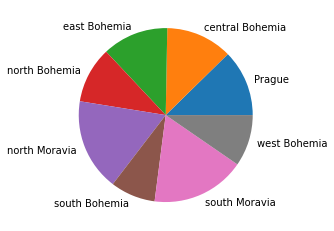

In [105]:
plt.pie(client_region, explode=None, labels=client_region.index, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True)

In [106]:
client_region_ratio = client_region/client_region.sum()*100
client_region_ratio

Region
Prague             12.348668
central Bohemia    12.367294
east Bohemia       12.292792
north Bohemia      10.448873
north Moravia      17.135407
south Bohemia       8.362824
south Moravia      17.452039
west Bohemia        9.592103
Name: Region, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002018AE3E940>],
      dtype=object)

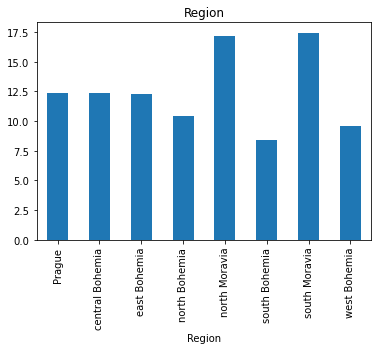

In [107]:
client_region_ratio.plot(kind='bar', subplots=True)

In [108]:
client_grp = datamart.groupby('client_type').agg('count')[['client_id','total_loan', 'Nbr_of_payement_orders']]
client_grp.reset_index(inplace=True)

In [109]:
client_grp_pv = client_grp.pivot_table(columns='client_type')
client_grp_pv

client_type,DISPONENT,OWNER
Nbr_of_payement_orders,802,3758
client_id,869,4500
total_loan,145,682


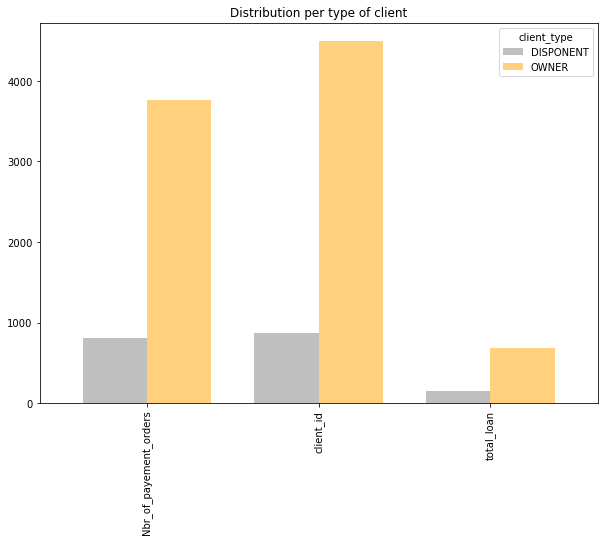

In [110]:
client_grp_pv.plot (kind = 'bar',
                    title = 'Distribution per type of client',
                    width = 0.75,
                   alpha=0.5,
                    color= ('grey', 'orange'),
                   figsize = (10, 7))

In [111]:
#group transactions by operations types
trans_count = trans.groupby('operation').agg('count')['trans_id']
trans_ratio = trans_count/trans_count.sum()*100
trans_ratio

operation
PREVOD NA UCET    23.852676
PREVOD Z UCTU      7.469715
VKLAD             17.950289
VYBER             49.807033
VYBER KARTOU       0.920287
Name: trans_id, dtype: float64

In [112]:
#Rename indexes
trans_ratio.rename(index={'VKLAD':'Credit in cash', 'PREVOD Z UCTU':'Collection from another bank', 'VYBER':'Withdrawal in cash',
                             'PREVOD NA UCET':'Remittance to another bank','VYBER KARTOU':'Withdrawal from credit card'}, inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002018AF07FD0>],
      dtype=object)

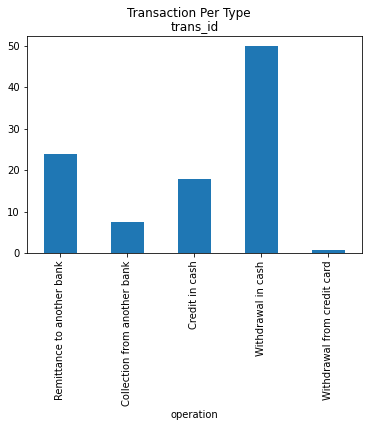

In [113]:
trans_ratio.plot(kind='bar', title= 'Transaction Per Type', subplots=True)

Verify correlation among variables

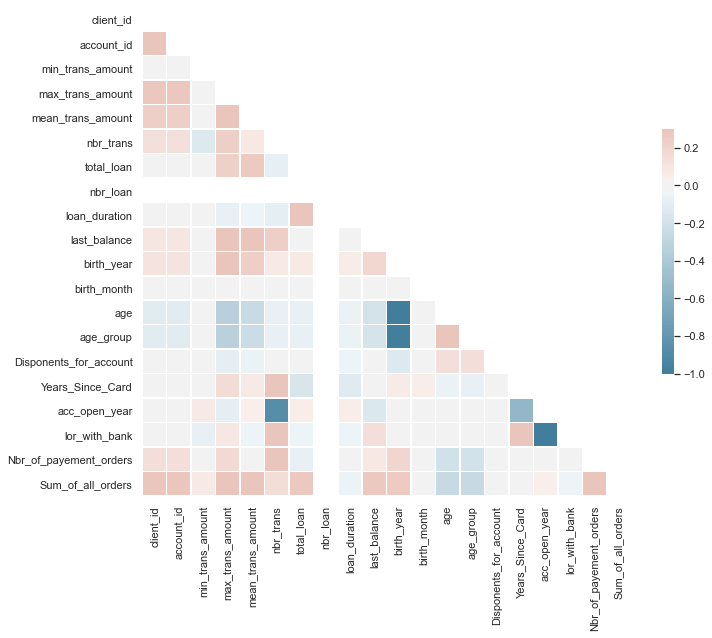

In [114]:
sns.set(style="white")

# Compute the correlation matrix
corr = datamart.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [115]:
# selecting relevant columns for correlation matrix
datamart_temp = datamart[["nbr_trans", "total_loan","age","Years_Since_Card","lor_with_bank","Nbr_of_payement_orders"]]
datamart_temp.head(1)

,nbr_trans,total_loan,age,Years_Since_Card,lor_with_bank,Nbr_of_payement_orders
0,239,NaN,29,NaN,4,1.0


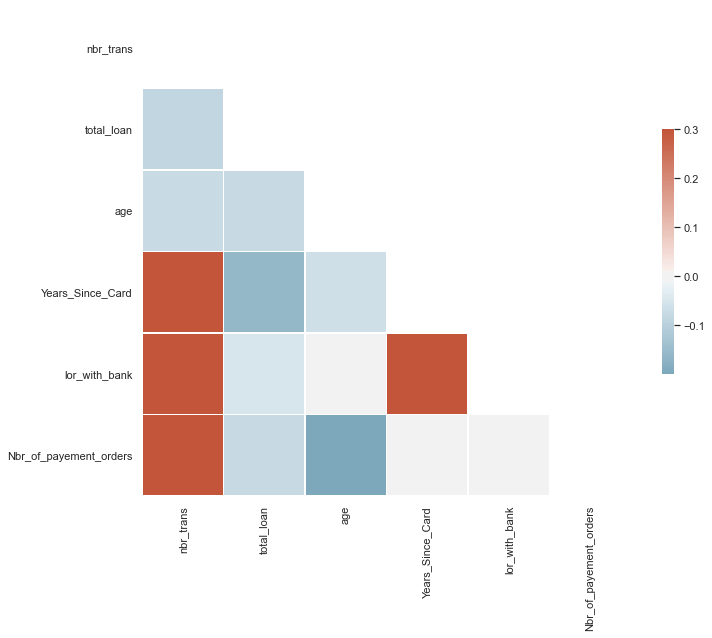

In [116]:
# Creating the correlation matrix
sns.set(style="white")

# Compute the correlation matrix
matrix = datamart_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### LOAN STATUS ANALYSIS

In [117]:
# Count of number of loans under each loan status

loan_status_count = datamart.groupby(['loan_status'])['client_id'].count()
loan_status_count.to_frame()

# 'A' stands for contract finished, no problems,
# 'B' stands for contract finished, loan not payed,
# 'C' stands for running contract, OK so far,
# 'D' stands for running contract, client in debt

,client_id
loan_status,
A,258
B,31
C,493
D,45


We have 289 finished contracts (A and B) with 10.72% bad debts. We have 538 running contracts (C and D) with 8.36% potential bad debts. Maybe the lending of money has stricter background check now than earlier.

In [118]:
# counverting the loan  status count to dataframe
loan_status_df = datamart.groupby(['loan_status'])['client_id'].count().to_frame()

# Adding column with average length of relationship with the bank for each loan status to see if any pattern found
loan_status_df['avg_lor'] = datamart.groupby(['loan_status'])['lor_with_bank'].mean()

# Adding column with average age of the clients/loan borrowers for each loan status to see if any pattern found
loan_status_df['avg_age'] = datamart.groupby(['loan_status'])['age'].mean()

# Adding columns for minimum, maximum and average closing balance for each loan status group
loan_status_df['avg_ending_balance'] = datamart.groupby(['loan_status'])['last_balance'].mean()
loan_status_df['min_ending_balance'] = datamart.groupby(['loan_status'])['last_balance'].min()
loan_status_df['max_ending_balance'] = datamart.groupby(['loan_status'])['last_balance'].max()

# Renaming the loan status from alphabets to meaningful names for better understanding
loan_status_df.rename(index = {'A': 'Perfect (A)', 'B': 'Bad Debt (B)', 'C':'Good So Far (C)', 'D':'Possible Trouble (D)'}, inplace=True)

In [119]:
# summing total number of loans
total_loans = loan_status_df['client_id'].sum()
total_loans

827

In [120]:
# Computing % of loans under each loan status and rounding it with 2 decimal places, converting it to dataframe and renaming a column
loan_status_percent = round((loan_status_df['client_id']/total_loans*100), 2)
loan_status_percent = loan_status_percent.to_frame()
loan_status_percent.rename(columns = {'client_id': '% of total loans'}, inplace=True)

# Rounding off the figures and adding columns created earlier to the new dataframe
loan_status_percent['avg_lor'] = round((loan_status_df['avg_lor']),2)
loan_status_percent['avg_age'] = round((loan_status_df['avg_age']),2)
loan_status_percent['min_ending_balance'] = round((loan_status_df['min_ending_balance']),2)
loan_status_percent['avg_ending_balance'] = round((loan_status_df['avg_ending_balance']),2)
loan_status_percent['max_ending_balance'] = round((loan_status_df['max_ending_balance']),2)
loan_status_percent

,% of total loans,avg_lor,avg_age,min_ending_balance,avg_ending_balance,max_ending_balance
loan_status,,,,,,
Perfect (A),31.20,4.88,41.16,5567.8,56246.65,124542.5
Bad Debt (B),3.75,5.10,43.97,-6132.5,34477.33,108204.4
Good So Far (C),59.61,3.24,41.04,7610.9,50442.14,125279.8
Possible Trouble (D),5.44,3.73,39.51,-5845.8,34769.68,108857.0


Around 91% of the loans can be considered safe. The below calculation of negative balance reassures that no client with loan status A or C have overdrafts. We notice that the % of D (with running contract) is more than % of B (finished contract). While the average age of A and C borrowers are very similar, we can't say the same for B and D. It is also interesting to know that borrowers whose loan contract have finished but haven't yet repaid have an average length of relationship with bank of over 5 years which is more than for any other loan status. This may hint that maybe the bank's risk analysis and actuarial calculations have improved overtime. Earlier, they may have been liberal in lending money.

In [121]:
# Number of loan borrowers that have negative balance at the time of extraction of the data
negative_balance = datamart[(datamart['last_balance'] <= 0)][['last_balance', 'loan_status']].dropna()
negative_balance

,last_balance,loan_status
2166,-3350.9,B
2498,-1579.4,B
2566,-1453.7,D
2668,-2802.6,D
3750,-6132.5,B
4191,-5680.2,D
4230,-2365.2,D
4746,-5845.8,D
4864,-4887.5,D
5321,-5302.6,D


In [122]:
# Grouping the negative balances to count numbers per loan status
negative_balance.rename(columns = {'last_balance': 'nbr_clients_with_negative_bal'}, inplace=True)
negative_balance.groupby(['loan_status']).count()

,nbr_clients_with_negative_bal
loan_status,
B,3
D,7


In [123]:
# Clients under each loan status with balance in account more than loan borrowed
bal_more_than_loan_amt = datamart[(datamart['last_balance'] >= datamart['total_loan'])][['last_balance', 'loan_status']].dropna()
bal_more_than_loan_amt.groupby(['loan_status']).count()

,last_balance
loan_status,
A,91
B,2
C,58
D,3


Around 19% of the loan borrower have last balance more than the borrowed amount. This maybe a positive thing but no concrete conclusions can be drawn as the last balance doesn't indicate future cashflows from client accounts.

In [124]:
# Number of borrowers with running contract who have current balance less than total loan amount
deficit_running_contract_C = datamart[(datamart['last_balance'] <= datamart['total_loan']) & (datamart['loan_status'] == 'C')]['last_balance'].dropna().count()
deficit_running_contract_D = datamart[(datamart['last_balance'] <= datamart['total_loan']) & (datamart['loan_status'] == 'D')]['last_balance'].dropna().count()
deficit_running_contract_C, deficit_running_contract_D

(435, 42)

Majority of the current borrowers have a virtual deficit balance in their account. This again doesn't suggest anything concrete but can be important information for the bank to keep a track.

### LOAN STATUS BY GROUP AGE

In [125]:
# Number of clients per loan status per age group
loan_by_age_group = datamart[['age_group', 'loan_status','client_id']].groupby(['loan_status','age_group']).agg('count')
loan_by_age_group

client_id
loan_status age_group           
A           10                 7
            20                56
            30                57
            40                56
            50                61
            60                21
B           20                 6
            30                 4
            40                 7
            50                10
            60                 4
C           10                13
            20               103
            30               115
            40               114
            50               113
            60                35
D           10                 1
            20                11
            30                12
            40                 9
            50                 6
            60                 6

The 115 for C status for people between 30 and 40. It is really realistic as a situation and it reflects an idea of health of the customer base. We expect from this higher certainty to pay as they a higher LifeExpectancy/IncomeGrowth ratio.

In [126]:
# Loans issued per year for each loan status
datamart[['acc_open_year', 'loan_status','client_id']].groupby(['loan_status','acc_open_year']).agg('count')

client_id
loan_status acc_open_year           
A           1993                 131
            1994                  34
            1995                  32
            1996                  53
            1997                   8
B           1993                  17
            1994                   3
            1995                   8
            1996                   3
C           1993                  29
            1994                  39
            1995                  82
            1996                 213
            1997                 130
D           1993                   7
            1994                   4
            1995                   9
            1996                  20
            1997                   5

From this we can highlight a clear trend: The trend of "A" loans (debt already repaid) decreases over the years, as it is clear that people that created their account earlier have already made it to repay all debt splits. Moreover, type "C" loans (splits are still due but regular position) counts increase over the years. Customers that opened the account more recently just obtained the loan.

### PROPORTION OF CARDS ISSUED

In [127]:
# counting number of card holders per card type
card[['card_id','type']].groupby('type').agg('count')

,card_id
type,
classic,659
gold,88
junior,145


In [128]:
# calculating nmber of cards of each type issued per year
card[['card_id','type','issue_year']].groupby(['type','issue_year']).agg('count')

card_id
type    issue_year         
classic 1993              1
        1994             17
        1995             42
        1996             83
        1997            190
        1998            326
gold    1995              4
        1996              5
        1997             26
        1998             53
junior  1994              4
        1995             17
        1996             28
        1997             26
        1998             70

So from this we can see dramatic increase in card issuing during the last 2 years. The classic one is still the most relevant one.


Number of accounts issued by year:

In [129]:
account[['frequency','acc_open_year', 'account_id']].groupby(['frequency','acc_open_year']).agg('count')

account_id
frequency          acc_open_year            
POPLATEK MESICNE   1993                 1056
                   1994                  399
                   1995                  614
                   1996                 1267
                   1997                  831
POPLATEK PO OBRATU 1993                   21
                   1994                   13
                   1995                   14
                   1996                   28
                   1997                   17
POPLATEK TYDNE     1993                   62
                   1994                   27
                   1995                   33
                   1996                   68
                   1997                   50